In [21]:
import pandas as pd
import numpy as np
import sklearn

In [22]:
# Ler o arquivo CSV e criar um DataFrame
df = pd.read_csv('test.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,84693.0,-0.439952,0.683758,1.225814,0.639113,0.716765,0.089295,0.657718,0.034213,-0.472679,...,0.127443,0.588590,-0.145728,-0.322900,-0.299744,-0.310295,0.248317,-0.011493,19.00,0
1,84694.0,-4.868108,1.264420,-5.167885,3.193648,-3.045621,-2.096166,-6.445610,2.422536,-3.214055,...,1.269205,0.057657,0.629307,-0.168432,0.443744,0.276539,1.441274,-0.127944,12.31,1
2,84695.0,1.013114,-0.334412,1.305208,0.837406,-1.126833,-0.064321,-0.594753,0.147737,0.536360,...,0.017079,0.112210,-0.016084,0.595033,0.201073,0.278215,0.007457,0.030762,66.60,0
3,84695.0,0.969231,-0.233554,0.238473,0.145793,-0.545741,-0.970680,0.347393,-0.209522,-0.342571,...,-0.362820,-1.417272,0.162136,0.541628,-0.079465,0.268702,-0.101237,0.028234,141.00,0
4,84696.0,-0.856523,1.080875,1.866956,1.729941,-0.161741,0.028789,0.401787,0.043774,-0.213916,...,0.007365,0.077392,-0.221906,0.394141,0.237225,-0.080102,-0.291408,0.092140,2.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142398,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
142399,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
142400,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
142401,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


1) A variavel resposta é a Class, 1 indica que é fraude e 0 indica que não. Tirei essa conclusão pois as outras variaveis são floats, logo não faz sentido valores floats indicarem se é fruade ou não.

1)A)

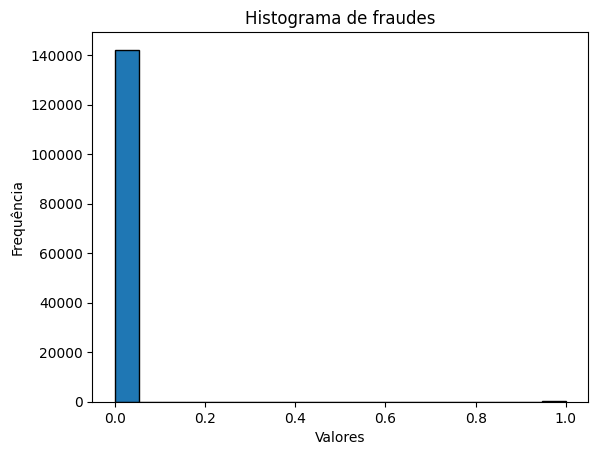

0    142180
1       223
Name: Class, dtype: int64

In [23]:
import matplotlib.pyplot as plt

# Plotar histograma
plt.hist(df['Class'], bins='auto', edgecolor='black')

# Configurar o título e rótulos dos eixos
plt.title('Histograma de fraudes')
plt.xlabel('Valores')
plt.ylabel('Frequência')

# Exibir o histograma
plt.show()
contagem = df['Class'].value_counts()
contagem

B) A variavel Time é a coluna que contém metadado, pois um metadado normalmente contêm informações adicionais sobre os dados, como descrição, nome, tipo de dado, unidade de medida, entre outros, e a Time nos fornece o tempo.

2)

In [24]:
import pandas as pd
import random
from sklearn.metrics import roc_auc_score

# Carregando os dados de treino
df_train = pd.read_csv('train.csv')

X_train = df_train.drop(['Time', 'Class'], axis=1)
y_train = df_train['Class']

# Modelo que classifica aleatoriamente
random_pred = [random.choice([0, 1]) for _ in range(len(y_train))]

# Modelo que classifica todos os casos como fraude
fraude_pred = [1] * len(y_train)

# Modelo que classifica todos os casos como não fraude
nao_fraude_pred = [0] * len(y_train)

# Calcular a acurácia
accuracy_random = sum(random_pred == y_train) / len(y_train)
accuracy_fraud = sum(fraude_pred == y_train) / len(y_train)
accuracy_non_fraud = sum(nao_fraude_pred == y_train) / len(y_train)

# Calcular a AUC 
auc_random = roc_auc_score(y_train, random_pred)
auc_fraud = roc_auc_score(y_train, fraude_pred)
auc_non_fraud = roc_auc_score(y_train, nao_fraude_pred)

# Imprimir as métricas
print(f"Acurácia (aleatório): {accuracy_random}")
print(f"AUC (aleatório): {auc_random}\n")
print(f"Acurácia (todos os casos como fraude): {accuracy_fraud}")
print(f"AUC (todos os casos como fraude): {auc_fraud}\n")
print(f"Acurácia (todos os casos como não fraude): {accuracy_non_fraud}")
print(f"AUC (todos os casos como não fraude): {auc_non_fraud}\n")

Acurácia (aleatório): 0.4989958147243055
AUC (aleatório): 0.5078454393651358

Acurácia (todos os casos como fraude): 0.0018889918822504986
AUC (todos os casos como fraude): 0.5

Acurácia (todos os casos como não fraude): 0.9981110081177496
AUC (todos os casos como não fraude): 0.5



B) Considerando que estamos trabalhando com um problema de detecção de fraudes, algo que tem um desequilibrio significativo no número de fraudes e não fraudes, a métrica mais apropriada para medir os resultados dos modelos nessa base de dados é a AUC, pois ela é muito útil quando há um desequilíbrio de classes, porque leva em consideração a classificação correta em diferentes limiares de probabilidade.

3)
A)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# Definir os valores dos hiperparâmetros a serem testados
param_grid = {
  'n_estimators': [10, 50, 100, 200],
  'max_depth': [2, 3, 4, 5]  
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='roc_auc')

In [26]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='roc_auc')

In [27]:
best_model = grid_search.best_estimator_
print(best_model)

RandomForestClassifier(max_depth=5, random_state=42)


In [28]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 5, 'n_estimators': 100}
0.9673589128101902


B)

In [29]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='roc_auc')

In [30]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='roc_auc')

In [31]:
best_model = grid_search.best_estimator_
print(best_model)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=50,
                       random_state=42)


In [32]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 5, 'n_estimators': 50}
0.9810531580905045


O parâmetro class_weight='balanced' no Random Forest é usado para lidar com desequilíbrio de classes em problemas de classificação. Quando definido como 'balanced', o Random Forest dará mais importância à classe menos representada, permitindo que o modelo aprenda com mais foco nessa classe e, assim, possa realizar previsões mais precisas para essa classe.

4)

In [33]:
# Utilizando a base de teste

X_test = df.drop(['Time', 'Class'], axis=1)
y_test = df['Class']

# Obtendo as probabilidades de fraude
proba = best_model.predict_proba(X_test)

# Criando um DataFrame contendo as probabilidades de classe para cada transação e a classe verdadeira:
df_predictions = pd.DataFrame({'Probabilidade_fraude': proba[:, 1], 'Class': y_test})

# Ordenando as transações com base nas probabilidades de fraude em ordem decrescente:
df_predictions = df_predictions.sort_values(by='Probabilidade_fraude', ascending=False)
top_1 = df_predictions.head(int(len(df_predictions) * 0.01))

# Calulando o lucro
lucro_fraude = len(top_1[top_1['Class'] == 1]) * 100
nao_fraude_preju = len(top_1[top_1['Class'] == 0]) * 2
lucro = lucro_fraude - nao_fraude_preju

print(f"lucro: {lucro} reais\n")

lucro: 16532 reais

